In [0]:
#Dataset : http://cb.lk/covid_19
!wget http://cb.lk/covid_19

In [0]:
!unzip covid_19

In [0]:
Train_Path='CovidDataset/Train'
Val_Path='CovidDataset/Val'


In [0]:
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


In [0]:
#CNN based model on keras.
#the choice of adding convolution or pooling layer is totally up to your choice
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])




In [0]:
model.summary()

In [0]:
#Train from scratch
train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen=image.ImageDataGenerator(rescale=1/255)

In [0]:
train_gen=train_datagen.flow_from_directory(
    Train_Path,
    target_size=(224,224),
    class_mode='binary',
    batch_size=32
)


Found 224 images belonging to 2 classes.


In [0]:
train_gen.class_indices

{'Covid': 0, 'Normal': 1}

In [0]:
val_gen=test_datagen.flow_from_directory(
    Val_Path,
    target_size=(224,224),
    class_mode='binary',
    batch_size=32
)

Found 60 images belonging to 2 classes.


In [0]:
hist=model.fit_generator(
    train_gen,
    steps_per_epoch=8,
    epochs=10,
    validation_data=val_gen,
    validation_steps=2
)

Epoch 1/10
8/8 [==============================] - 92s 11s/step - loss: 1.1296 - accuracy: 0.5195 - val_loss: 0.6771 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 78s 10s/step - loss: 0.7004 - accuracy: 0.5312 - val_loss: 0.6837 - val_accuracy: 0.6667
Epoch 3/10
8/8 [==============================] - 77s 10s/step - loss: 0.6587 - accuracy: 0.6523 - val_loss: 0.5869 - val_accuracy: 0.9333
Epoch 4/10
8/8 [==============================] - 78s 10s/step - loss: 0.4911 - accuracy: 0.7734 - val_loss: 0.2788 - val_accuracy: 0.9167
Epoch 5/10
8/8 [==============================] - 78s 10s/step - loss: 0.3791 - accuracy: 0.8516 - val_loss: 0.2333 - val_accuracy: 0.9500
Epoch 6/10
8/8 [==============================] - 78s 10s/step - loss: 0.2929 - accuracy: 0.8828 - val_loss: 0.1247 - val_accuracy: 0.9333
Epoch 7/10
8/8 [==============================] - 83s 10s/step - loss: 0.2459 - accuracy: 0.8906 - val_loss: 0.2011 - val_accuracy: 0.9667
Epoch 8/10
8/8 [===========

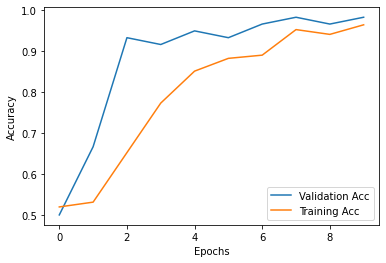

In [0]:
h=hist.history
plt.plot(h['val_accuracy'],label="Validation Acc")
plt.plot(h['accuracy'],label="Training Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [0]:
import os
import cv2
path=os.path.join(Val_Path,"Normal/NORMAL2-IM-0395-0001.jpeg")
img = cv2.imread(path)
img = cv2.resize(img , (224,224))
img = np.expand_dims(img,axis=0)


pred = model.predict(img)
label = np.argmax(pred[0])
print(label)

0
